In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
#Import the 800MB file from AWS s3 bucket
data = pd.read_csv('crime_temp_hardship_merged_df.csv')

C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
data['Domestic'].unique()
data.dropna(how='any', inplace=True)


In [109]:
unique_primary = Timeseries_data['Primary Type'].unique()
unique_primary

array(['WEAPONS VIOLATION', 'BATTERY', 'DECEPTIVE PRACTICE', 'ASSAULT',
       'OTHER OFFENSE', 'CRIMINAL DAMAGE', 'NARCOTICS', 'THEFT',
       'BURGLARY', 'INTERFERENCE WITH PUBLIC OFFICER',
       'CRIMINAL TRESPASS', 'ROBBERY', 'OFFENSE INVOLVING CHILDREN',
       'MOTOR VEHICLE THEFT', 'CRIM SEXUAL ASSAULT',
       'PUBLIC PEACE VIOLATION', 'KIDNAPPING', 'HOMICIDE', 'ARSON',
       'STALKING', 'SEX OFFENSE', 'INTIMIDATION', 'LIQUOR LAW VIOLATION',
       'CONCEALED CARRY LICENSE VIOLATION', 'HUMAN TRAFFICKING',
       'GAMBLING', 'NON-CRIMINAL', 'OTHER NARCOTIC VIOLATION',
       'PROSTITUTION', 'OBSCENITY', 'PUBLIC INDECENCY', 'NON - CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [115]:
categorized_data = Timeseries_data[Timeseries_data['Primary Type'] == 'BATTERY']
Timeseries_data = data[['date','Community Areas','Primary Type','Temp Avg (° F)','PERCENT OF HOUSING CROWDED','PERCENT HOUSEHOLDS BELOW POVERTY',\
                       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA','PER CAPITA INCOME ','HARDSHIP INDEX']].copy()
Timeseries_data

,date,Community Areas,Primary Type,Temp Avg (° F),PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PER CAPITA INCOME,HARDSHIP INDEX
0,2019-05-12,67.0,WEAPONS VIOLATION,47.0,3.6,29.6,16.5,17285.0,66.0
1,2019-05-12,67.0,WEAPONS VIOLATION,47.0,3.6,29.6,16.5,17285.0,66.0
2,2019-05-12,67.0,BATTERY,47.0,3.6,29.6,16.5,17285.0,66.0
3,2019-05-12,67.0,DECEPTIVE PRACTICE,47.0,3.6,29.6,16.5,17285.0,66.0
4,2019-05-12,67.0,ASSAULT,47.0,3.6,29.6,16.5,17285.0,66.0
5,2019-05-12,67.0,OTHER OFFENSE,47.0,3.6,29.6,16.5,17285.0,66.0
6,2019-05-12,67.0,BATTERY,47.0,3.6,29.6,16.5,17285.0,66.0
7,2019-05-12,40.0,OTHER OFFENSE,47.0,3.6,29.6,16.5,17285.0,66.0
8,2019-05-12,67.0,CRIMINAL DAMAGE,47.0,3.6,29.6,16.5,17285.0,66.0
9,2019-05-12,67.0,NARCOTICS,47.0,3.6,29.6,16.5,17285.0,66.0


In [114]:
Timeseries_data

,date,Community Areas,Primary Type,Temp Avg (° F),PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PER CAPITA INCOME,HARDSHIP INDEX
0,2019-05-12,67.0,WEAPONS VIOLATION,47.0,3.6,29.6,16.5,17285.0,66.0
1,2019-05-12,67.0,WEAPONS VIOLATION,47.0,3.6,29.6,16.5,17285.0,66.0
2,2019-05-12,67.0,BATTERY,47.0,3.6,29.6,16.5,17285.0,66.0
3,2019-05-12,67.0,DECEPTIVE PRACTICE,47.0,3.6,29.6,16.5,17285.0,66.0
4,2019-05-12,67.0,ASSAULT,47.0,3.6,29.6,16.5,17285.0,66.0
5,2019-05-12,67.0,OTHER OFFENSE,47.0,3.6,29.6,16.5,17285.0,66.0
6,2019-05-12,67.0,BATTERY,47.0,3.6,29.6,16.5,17285.0,66.0
7,2019-05-12,40.0,OTHER OFFENSE,47.0,3.6,29.6,16.5,17285.0,66.0
8,2019-05-12,67.0,CRIMINAL DAMAGE,47.0,3.6,29.6,16.5,17285.0,66.0
9,2019-05-12,67.0,NARCOTICS,47.0,3.6,29.6,16.5,17285.0,66.0


In [159]:
#correct code
temp = Timeseries_data.groupby(["date", "Community Areas", "Primary Type"])
temp_agg = temp.agg({"Temp Avg (° F)": "mean", "HARDSHIP INDEX": "mean", "PER CAPITA INCOME ": "count"}).reset_index()
#temp_agg = temp_agg.rename({"": "Count"})
categorized_data = temp_agg[temp_agg['Primary Type'] == unique]
#categorized_data.to_csv(unique + '.csv')


C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [161]:
categorized_data.rename(columns={'PER CAPITA INCOME ':'incidents'}, inplace=True)

In [166]:
temp_agg.to_csv('chartdata2.csv')

In [252]:
results1=[]
results2=[]
results3=[]
finalresult=[]
for unique in unique_primary:
    #correct code
    temp = Timeseries_data.groupby(["date", "Community Areas", "Primary Type"])
    temp_agg = temp.agg({"Temp Avg (° F)": "mean", "HARDSHIP INDEX": "mean", "PER CAPITA INCOME ": "count"}).reset_index()
    #temp_agg = temp_agg.rename({"": "Count"})
    categorized_data.rename(columns={'PER CAPITA INCOME ':'incidents', 'Temp Avg (° F)': 'Temp Avg'}, inplace=True)
    categorized_data = temp_agg[temp_agg['Primary Type'] == unique]
    new = categorized_data
    new.rename(columns={'Temp Avg (° F)': 'Temp_avg'}, inplace=True)
    new.rename(columns={'PER CAPITA INCOME ': 'incidents'}, inplace=True)
    #categorized_data.to_csv(unique + '.csv')
    X=new[['Temp_avg','Community Areas']]
    y = new['incidents'].values.reshape(-1,1)
    print(X.shape, y.shape)
    X=new[['Temp_avg','Community Areas']]
    y = new['incidents'].values.reshape(-1,1)
    print(X.shape, y.shape)
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    training_score = model.score(X_train,y_train)
    testing_score = model.score(X_test,y_test)
    #####################Cant save the model##########
    #model.save(unique + '_model.h5')

    ########SCORES######
    print(f'{unique}')
    print(f'Training Score: {training_score}')
    print(f'Testing Score: {testing_score}')
    results1.append(unique)
    results2.append(training_score)
    results3.append(testing_score)

results1 = pd.DataFrame(results1)
results2 = pd.DataFrame(results2)
results3 = pd.DataFrame(results3)
frames = [results1,results2,results3]
finalresult = pd.concat(frames,axis=1)
finalresult.columns = ['Crime_type', 'training_score','testing_score']
finalresult.to_csv('model_by_crime.csv')

C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(30313, 2) (30313, 1)
(30313, 2) (30313, 1)
WEAPONS VIOLATION
Training Score: 0.0037351747053148143
Testing Score: 0.005838233132526072


C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(174510, 2) (174510, 1)
(174510, 2) (174510, 1)
BATTERY
Training Score: 0.01330830187823373
Testing Score: 0.012040447958281741


C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(87359, 2) (87359, 1)
(87359, 2) (87359, 1)
DECEPTIVE PRACTICE
Training Score: 7.095809162926958e-05
Testing Score: -0.00019171901704750915


C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(108784, 2) (108784, 1)
(108784, 2) (108784, 1)
ASSAULT
Training Score: 0.007738578787766626
Testing Score: 0.00601252633498639


C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(107433, 2) (107433, 1)
(107433, 2) (107433, 1)
OTHER OFFENSE
Training Score: 0.00047785981592218807
Testing Score: 0.0004977906516991926


C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(147843, 2) (147843, 1)
(147843, 2) (147843, 1)
CRIMINAL DAMAGE
Training Score: 0.007234402719032862
Testing Score: 0.007168761859975947


C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(96401, 2) (96401, 1)
(96401, 2) (96401, 1)
NARCOTICS
Training Score: 0.007356875225247528
Testing Score: 0.0067279724365953975


C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(190746, 2) (190746, 1)
(190746, 2) (190746, 1)
THEFT
Training Score: 0.004784079001102448
Testing Score: 0.0042881517180094475


C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(99727, 2) (99727, 1)
(99727, 2) (99727, 1)
BURGLARY
Training Score: 0.004630724460179758
Testing Score: 0.004640436584734342


C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(10163, 2) (10163, 1)
(10163, 2) (10163, 1)
INTERFERENCE WITH PUBLIC OFFICER
Training Score: 0.0007395944437470492
Testing Score: 0.0006041034332588957


C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(55470, 2) (55470, 1)
(55470, 2) (55470, 1)
CRIMINAL TRESPASS
Training Score: 0.00039497284239109476
Testing Score: -0.0005156530892598266


C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(74229, 2) (74229, 1)
(74229, 2) (74229, 1)
ROBBERY
Training Score: 0.002289797750172129
Testing Score: 0.0016663484092042102


C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(19170, 2) (19170, 1)
(19170, 2) (19170, 1)
OFFENSE INVOLVING CHILDREN
Training Score: 0.004657273403131934
Testing Score: 0.00409509355636184


C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(84152, 2) (84152, 1)
(84152, 2) (84152, 1)
MOTOR VEHICLE THEFT
Training Score: 0.0009706013943066027
Testing Score: -9.606452604882243e-05


C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(12336, 2) (12336, 1)
(12336, 2) (12336, 1)
CRIM SEXUAL ASSAULT
Training Score: 0.0001773439759018558
Testing Score: -0.0008292687684936517


C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(20520, 2) (20520, 1)
(20520, 2) (20520, 1)
PUBLIC PEACE VIOLATION
Training Score: 0.0013216331930421266
Testing Score: 0.00016166511211013201


C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(2062, 2) (2062, 1)
(2062, 2) (2062, 1)
KIDNAPPING
Training Score: 0.0011490797611944936
Testing Score: -0.005045018146123237


C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(4597, 2) (4597, 1)
(4597, 2) (4597, 1)
HOMICIDE
Training Score: 0.0002754516262517548
Testing Score: -5.699106444900792e-05


C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(3978, 2) (3978, 1)
(3978, 2) (3978, 1)
ARSON
Training Score: 0.0005372864139950861
Testing Score: -0.000809945101419185


C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(1639, 2) (1639, 1)
(1639, 2) (1639, 1)
STALKING
Training Score: 0.00017374917610690765
Testing Score: -0.0006232815032392036


C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(8871, 2) (8871, 1)
(8871, 2) (8871, 1)
SEX OFFENSE
Training Score: 0.0007248255541624227
Testing Score: -0.0013705803077794787


C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(1390, 2) (1390, 1)
(1390, 2) (1390, 1)
INTIMIDATION
Training Score: 0.00028442117264093625
Testing Score: -0.0011743345966370722


C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(3552, 2) (3552, 1)
(3552, 2) (3552, 1)
LIQUOR LAW VIOLATION
Training Score: 0.0007368459268557448
Testing Score: 0.00011222945712241472


C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(362, 2) (362, 1)
(362, 2) (362, 1)
CONCEALED CARRY LICENSE VIOLATION
Training Score: 0.01075657246191808
Testing Score: 0.01079634151325104


C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(52, 2) (52, 1)
(52, 2) (52, 1)
HUMAN TRAFFICKING
Training Score: 0.09317197538915456
Testing Score: 0.0


C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(3898, 2) (3898, 1)
(3898, 2) (3898, 1)
GAMBLING
Training Score: 0.0071636829499845955
Testing Score: 0.010770919946464175


C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(159, 2) (159, 1)
(159, 2) (159, 1)
NON-CRIMINAL
Training Score: 1.0
Testing Score: 1.0


C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(52, 2) (52, 1)
(52, 2) (52, 1)
OTHER NARCOTIC VIOLATION
Training Score: 0.07923926565618189
Testing Score: -0.027128504257196043


C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(8055, 2) (8055, 1)
(8055, 2) (8055, 1)
PROSTITUTION
Training Score: 0.004871235985177136
Testing Score: -0.003917881169246851


C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(425, 2) (425, 1)
(425, 2) (425, 1)
OBSCENITY
Training Score: 0.013063622825028154
Testing Score: -0.03314142714528234


C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(106, 2) (106, 1)
(106, 2) (106, 1)
PUBLIC INDECENCY
Training Score: 1.0
Testing Score: 1.0


C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(38, 2) (38, 1)
(38, 2) (38, 1)
NON - CRIMINAL
Training Score: 1.0
Testing Score: 1.0
(9, 2) (9, 1)
(9, 2) (9, 1)
NON-CRIMINAL (SUBJECT SPECIFIED)
Training Score: 1.0
Testing Score: 1.0


C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [248]:
finalresult

,Crime_type,training_score,testing_score
0,WEAPONS VIOLATION,0.003735,0.005838
1,BATTERY,0.013308,0.012040
2,DECEPTIVE PRACTICE,0.000071,-0.000192
3,ASSAULT,0.007739,0.006013
4,OTHER OFFENSE,0.000478,0.000498
5,CRIMINAL DAMAGE,0.007234,0.007169
6,NARCOTICS,0.007357,0.006728
7,THEFT,0.004784,0.004288
8,BURGLARY,0.004631,0.004640
9,INTERFERENCE WITH PUBLIC OFFICER,0.000740,0.000604


In [239]:
results1 = pd.DataFrame(results1)
results2 = pd.DataFrame(results2)
results3 = pd.DataFrame(results3)
frames = [results1,results2,results3]
result = pd.concat(frames,axis=1)
result.columns = ['Crime_type', 'training_score','testing_score']
result

ValueError: Length mismatch: Expected axis has 0 elements, new values have 3 elements

In [214]:

frame = []
for unique in unique_primary:
    one = "test"
    new= one+unique
    frame.append(new)
frame

['testWEAPONS VIOLATION',
 'testBATTERY',
 'testDECEPTIVE PRACTICE',
 'testASSAULT',
 'testOTHER OFFENSE',
 'testCRIMINAL DAMAGE',
 'testNARCOTICS',
 'testTHEFT',
 'testBURGLARY',
 'testINTERFERENCE WITH PUBLIC OFFICER',
 'testCRIMINAL TRESPASS',
 'testROBBERY',
 'testOFFENSE INVOLVING CHILDREN',
 'testMOTOR VEHICLE THEFT',
 'testCRIM SEXUAL ASSAULT',
 'testPUBLIC PEACE VIOLATION',
 'testKIDNAPPING',
 'testHOMICIDE',
 'testARSON',
 'testSTALKING',
 'testSEX OFFENSE',
 'testINTIMIDATION',
 'testLIQUOR LAW VIOLATION',
 'testCONCEALED CARRY LICENSE VIOLATION',
 'testHUMAN TRAFFICKING',
 'testGAMBLING',
 'testNON-CRIMINAL',
 'testOTHER NARCOTIC VIOLATION',
 'testPROSTITUTION',
 'testOBSCENITY',
 'testPUBLIC INDECENCY',
 'testNON - CRIMINAL',
 'testNON-CRIMINAL (SUBJECT SPECIFIED)']

Text(0.5, 1.0, 'Residual Plot')

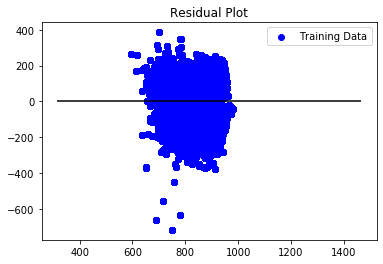

In [39]:
# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
#plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

Text(0.5, 1.0, 'Residual Plot')

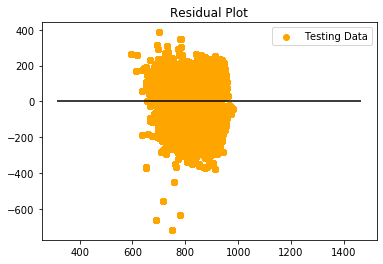

In [40]:
# Plot the Residuals for the Training and Testing data
#plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")